Проверка результата

In [7]:
#загрузка разметки
import pandas as pd

df_pred= pd.read_csv('labeled_ions_team_name_1.csv', sep = ';', index_col = [0]) #загрузить csv автоматической разметки
# df_true = pd.read_csv('labeled_ions_true_new.csv', sep = ',', index_col = [0]) #загрузить файл csv ручной разметки

In [8]:
#данные ручной разметки
df_true

NameError: name 'df_true' is not defined

In [9]:
#данные автоматической разметки
df_pred

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,760e3945-e0c9-4c9a-b78a-a68fbbee05cd.png,0.0,1.0,1.0,1.0
1,bc09db3b-dedf-49da-946c-efdf2304551b.png,1.0,0.0,1.0,1.0
2,45da543d-c099-4e17-9e18-f3c2776ae8b7.png,0.0,1.0,1.0,1.0
3,fbe18a1d-a194-4581-ad61-8aff1dcf045d.png,1.0,0.0,1.0,1.0
4,ccb1fa64-1a46-4680-82e3-178495a9121c.png,1.0,1.0,0.0,1.0
5,2067c2f1-a36b-4892-b96e-43028b0fea2d.png,1.0,1.0,1.0,1.0
6,687e714c-d32b-4c6b-9e26-d9dea275bccd.png,1.0,1.0,1.0,1.0
7,1813bf7c-24cc-4af0-a032-b70cfa74fbfa.png,1.0,0.0,1.0,1.0
8,7fd7c561-7522-46aa-b95b-9b66353eb63c.png,1.0,1.0,1.0,1.0
9,0f1ef869-4992-4a1a-af0d-9ed7dbc8d0fc.png,1.0,1.0,0.0,1.0


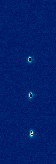

0.0 1.0 1.0 1.0


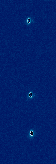

1.0 0.0 1.0 1.0


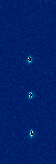

0.0 1.0 1.0 1.0


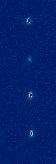

1.0 0.0 1.0 1.0


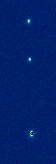

1.0 1.0 0.0 1.0


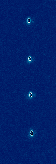

1.0 1.0 1.0 1.0


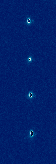

1.0 1.0 1.0 1.0


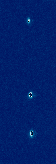

1.0 0.0 1.0 1.0


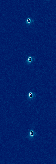

1.0 1.0 1.0 1.0


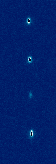

1.0 1.0 0.0 1.0


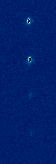

1.0 1.0 0.0 0.0


In [22]:
root = "./Входные данные/"
from IPython.display import Image, display
for index, row in df_pred.iterrows():
    display(Image(root + row.Filename))
    print(row["Qubit 1 state"], row["Qubit 2 state"], row["Qubit 3 state"], row["Qubit 4 state"])

In [10]:
# df_true['Class'] =  df_true['Qubit 1 state'] * 2**0 + df_true['Qubit 2 state'] * 2**1 + df_true['Qubit 3 state'] * 2**2 + df_true['Qubit 4 state'] * 2**3

df_pred['Class'] =  df_pred['Qubit 1 state'] * 2**0 + df_pred['Qubit 2 state'] * 2**1 + df_pred['Qubit 3 state'] * 2**2 + df_pred['Qubit 4 state'] * 2**3

In [11]:
Category = list(['|0000>', '|0001>','|0010>','|0011>',
                 '|0100>', '|0101>','|0110>','|0111>',
                 '|1000>', '|1001>','|1010>','|1011>',
                 '|1100>', '|1101>','|1110>','|1111>'])

In [12]:
import plotly.express as px

# создадим объект fig, в который поместим столбчатую диаграмму
fig = px.histogram(df_true, x=df_true.Class, nbins=16)

# применим метод .update_layout к объекту fig
fig.update_layout(
    title_text = 'распределение состояния ионов (кубитов) по ручной разметке', # заголовок
    xaxis_title_text = 'State', # подпись к оси x
    yaxis_title_text = 'Count', # подпись к оси y
    bargap = 0.2, # расстояние между столбцами

    # подписи классов на оси x
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        ticktext = Category #['Class 1', 'Class 2', 'Class 3'...]
    )
)

fig.show() #распределение состояния ионов (кубитов) по ручной разметке

NameError: name 'df_true' is not defined

In [9]:
#расчет метрики fidelity

def fidelity(prob_true, prob_pred):
    return np.sqrt((prob_true @ prob_pred)/np.sqrt(prob_true @ prob_true)/np.sqrt(prob_pred @ prob_pred))


In [10]:
import numpy as np
count_true, division = np.histogram(df_true['Class'])
count_pred, division = np.histogram(df_pred['Class'])

prob_true = count_true
prob_pred = count_pred

In [11]:
fidelity(prob_true, prob_pred)

0.9962937363691102